# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\FAISAL\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [7]:
#preprocessing the catagorical feature
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+','_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-','_')
project_data['project_grade_category'].value_counts()

Grades_PreK_2    44225
Grades_3_5       37137
Grades_6_8       16923
Grades_9_12      10963
Name: project_grade_category, dtype: int64

## 1.4 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades_PreK_2   
1           FL        2016-10-25 09:22:10             Grades_6_8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:19<00:00, 782.71it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.5 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
# printing some random essay titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[400])
print("="*50)
print(project_data['project_title'].values[25000])
print("="*50)
print(project_data['project_title'].values[50000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
Leave It Better Than You Found It!
Moving To Learn and Creative Expression
Help our Bridgeport Students to Improve Their Listening Skills!
Inspiring Minds by Enhancing the Educational Experience


In [21]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

We Need To Move It While We Input It!


In [23]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

We Need To Move It While We Input It!


In [24]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

We Need To Move It While We Input It 


In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 17202.09it/s]


In [27]:
# after preprocesing
preprocessed_project_title[20000]

'we need to move it while we input it'

## 1.6 Preparing data for models

In [28]:
# adding the columns of preprocessed_essays & preprocessed_project_title to the main dataframe
project_data["preprocessed_essays"]=preprocessed_essays
project_data["preprocessed_project_title"]=preprocessed_project_title

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [30]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
#Output:
    
#Loading Glove Model
#1917495it [06:32, 4879.69it/s]
#Done. 1917495  words loaded!

# ============================

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


1917495it [09:10, 3484.52it/s]


Done. 1917495  words loaded!
all the words in the coupus 17014413
the unique words in the coupus 58968
The number of words that are present in both glove vectors and our coupus 51503 ( 87.341 %)
word 2 vec length 51503


In [31]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [32]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [34]:
sentiment_pos=[]
for preprocessed_essay in preprocessed_essays:
    sentiment_pos.append(sid.polarity_scores(preprocessed_essay) ['pos'])

In [35]:
project_data["Positive_Sentiment_scores"] = sentiment_pos

In [36]:
sentiment_neg=[]
for preprocessed_essay in preprocessed_essays:
    sentiment_neg.append(sid.polarity_scores(preprocessed_essay) ['neg'])

In [37]:
project_data["Negative_Sentiment_scores"] = sentiment_neg

In [38]:
sentiment_neu=[]
for preprocessed_essay in preprocessed_essays:
    sentiment_neu.append(sid.polarity_scores(preprocessed_essay) ['neu'])

In [39]:
project_data["Neutral_Sentiment_scores"] = sentiment_neu

In [40]:
sentiment_com=[]
for preprocessed_essay in preprocessed_essays:
    sentiment_com.append(sid.polarity_scores(preprocessed_essay) ['compound'])

In [41]:
project_data["Compound_Sentiment_scores"] = sentiment_com

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [43]:
X=project_data[0:50000]
y = project_data['project_is_approved'][0:50000].values

In [44]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [45]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(22445, 26) (22445,)
(11055, 26) (11055,)
(16500, 26) (16500,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.2.1 Vectorizing Categorical data

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [48]:
clean_categories_featurenames=vectorizer.get_feature_names()

In [49]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [50]:
clean_subcategories_featurenames=vectorizer.get_feature_names()

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [52]:
school_state_featurenames=vectorizer.get_feature_names()

In [53]:
#replacing the nan values with blank spaces(pre-processing categorical feature)
X_train["teacher_prefix"].fillna(" ", inplace = True)
X_cv["teacher_prefix"].fillna(" ", inplace = True)
X_test["teacher_prefix"].fillna(" ", inplace = True)

In [54]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [55]:
teacher_prefix_featurenames=vectorizer.get_feature_names()

In [56]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [57]:
project_grade_category_featurenames=vectorizer.get_feature_names()

### 2.2.2 Vectorizing Numerical features

In [58]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [59]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [60]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['Negative_Sentiment_scores'].values.reshape(-1,1))

X_train_Negative_Sentiment_scores_norm = normalizer.transform(X_train['Negative_Sentiment_scores'].values.reshape(-1,1))
X_cv_Negative_Sentiment_scores_norm = normalizer.transform(X_cv['Negative_Sentiment_scores'].values.reshape(-1,1))
X_test_Negative_Sentiment_scores_norm = normalizer.transform(X_test['Negative_Sentiment_scores'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Negative_Sentiment_scores_norm.shape, y_train.shape)
print(X_cv_Negative_Sentiment_scores_norm.shape, y_cv.shape)
print(X_test_Negative_Sentiment_scores_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [61]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['Positive_Sentiment_scores'].values.reshape(-1,1))

X_train_Positive_Sentiment_scores_norm = normalizer.transform(X_train['Positive_Sentiment_scores'].values.reshape(-1,1))
X_cv_Positive_Sentiment_scores_norm = normalizer.transform(X_cv['Positive_Sentiment_scores'].values.reshape(-1,1))
X_test_Positive_Sentiment_scores_norm = normalizer.transform(X_test['Positive_Sentiment_scores'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Positive_Sentiment_scores_norm.shape, y_train.shape)
print(X_cv_Positive_Sentiment_scores_norm.shape, y_cv.shape)
print(X_test_Positive_Sentiment_scores_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [62]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['Neutral_Sentiment_scores'].values.reshape(-1,1))

X_train_Neutral_Sentiment_scores_norm = normalizer.transform(X_train['Neutral_Sentiment_scores'].values.reshape(-1,1))
X_cv_Neutral_Sentiment_scores_norm = normalizer.transform(X_cv['Neutral_Sentiment_scores'].values.reshape(-1,1))
X_test_Neutral_Sentiment_scores_norm = normalizer.transform(X_test['Neutral_Sentiment_scores'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Neutral_Sentiment_scores_norm.shape, y_train.shape)
print(X_cv_Neutral_Sentiment_scores_norm.shape, y_cv.shape)
print(X_test_Neutral_Sentiment_scores_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [63]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['Compound_Sentiment_scores'].values.reshape(-1,1))

X_train_Compound_Sentiment_scores_norm = normalizer.transform(X_train['Compound_Sentiment_scores'].values.reshape(-1,1))
X_cv_Compound_Sentiment_scores_norm = normalizer.transform(X_cv['Compound_Sentiment_scores'].values.reshape(-1,1))
X_test_Compound_Sentiment_scores_norm = normalizer.transform(X_test['Compound_Sentiment_scores'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Compound_Sentiment_scores_norm.shape, y_train.shape)
print(X_cv_Compound_Sentiment_scores_norm.shape, y_cv.shape)
print(X_test_Compound_Sentiment_scores_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [65]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.3.1 Vectorizing Text data

#### 2.3.1.1 Bag of words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_bow.shape, y_train.shape)
print(X_cv_preprocessed_essays_bow.shape, y_cv.shape)
print(X_test_preprocessed_essays_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [67]:
preprocessed_essays_bow_featurenames=vectorizer.get_feature_names()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_bow = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_bow = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_bow = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_bow.shape, y_train.shape)
print(X_cv_preprocessed_project_title_bow.shape, y_cv.shape)
print(X_test_preprocessed_project_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1871) (22445,)
(11055, 1871) (11055,)
(16500, 1871) (16500,)


In [69]:
preprocessed_project_title_bow_featurenames=vectorizer.get_feature_names()

#### 2.3.1.2 TFIDF vectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_essays_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_essays_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [71]:
preprocessed_essays_tfidf_featurenames=vectorizer.get_feature_names()

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_tfidf = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_tfidf = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_tfidf = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_project_title_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_project_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1871) (22445,)
(11055, 1871) (11055,)
(16500, 1871) (16500,)


In [73]:
preprocessed_project_title_tfidf_featurenames=vectorizer.get_feature_names()

#### 2.3.1.3 Using Pretrained Models: Avg W2V

In [74]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [75]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_train_preprocessed_essays_avg_w2v_vectors))
print(len(X_train_preprocessed_essays_avg_w2v_vectors[0]))


X_cv_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_essays_avg_w2v_vectors))
print(len(X_cv_preprocessed_essays_avg_w2v_vectors[0]))


X_test_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_test_preprocessed_essays_avg_w2v_vectors))
print(len(X_test_preprocessed_essays_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:17<00:00, 1307.93it/s]


22445
300


100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:08<00:00, 1344.13it/s]


11055
300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:11<00:00, 1437.62it/s]


16500
300


In [76]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_project_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_preprocessed_project_title_avg_w2v_vectors.append(vector)

print(len(X_train_preprocessed_project_title_avg_w2v_vectors))
print(len(X_train_preprocessed_project_title_avg_w2v_vectors[0]))


X_cv_preprocessed_project_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_preprocessed_project_title_avg_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_project_title_avg_w2v_vectors))
print(len(X_cv_preprocessed_project_title_avg_w2v_vectors[0]))


X_test_preprocessed_project_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_preprocessed_project_title_avg_w2v_vectors.append(vector)

print(len(X_test_preprocessed_project_title_avg_w2v_vectors))
print(len(X_test_preprocessed_project_title_avg_w2v_vectors[0]))


100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 23936.99it/s]


22445
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 25090.29it/s]


11055
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 23127.25it/s]


16500
300


#### 2.3.1.4 Using Pretrained Models: TFIDF weighted W2V

In [77]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_train_preprocessed_essays_tfidf_w2v_vectors[0]))


X_cv_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors[0]))


X_test_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_test_preprocessed_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [02:43<00:00, 137.55it/s]


22445
300


100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:32<00:00, 342.61it/s]


11055
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:42<00:00, 387.16it/s]


16500
300


In [79]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [80]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_project_title_tfidf_w2v_vectors))
print(len(X_train_preprocessed_project_title_tfidf_w2v_vectors[0]))


X_cv_preprocessed_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_project_title_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_project_title_tfidf_w2v_vectors[0]))


X_test_preprocessed_project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_project_title_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_project_title_tfidf_w2v_vectors))
print(len(X_test_preprocessed_project_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 19033.93it/s]


22445
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 20151.03it/s]


11055
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 19212.30it/s]


16500
300


### 2.3.2 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X1_train = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_preprocessed_essays_bow, X_train_preprocessed_project_title_bow, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_Negative_Sentiment_scores_norm, X_train_Positive_Sentiment_scores_norm, X_train_Neutral_Sentiment_scores_norm, X_train_Compound_Sentiment_scores_norm)).tocsr()
X1_train.shape

(22445, 6976)

In [82]:
X1_cv = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_preprocessed_essays_bow, X_cv_preprocessed_project_title_bow, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_Negative_Sentiment_scores_norm, X_cv_Positive_Sentiment_scores_norm, X_cv_Neutral_Sentiment_scores_norm, X_cv_Compound_Sentiment_scores_norm)).tocsr()
X1_cv.shape

(11055, 6976)

In [83]:
X1_test = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_preprocessed_essays_bow, X_test_preprocessed_project_title_bow, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_Negative_Sentiment_scores_norm, X_test_Positive_Sentiment_scores_norm, X_test_Neutral_Sentiment_scores_norm, X_test_Compound_Sentiment_scores_norm)).tocsr()
X1_test.shape

(16500, 6976)

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [84]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [85]:
# Please write all the code with proper documentation

In [86]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Using GridSearchCV
depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]
DT = DecisionTreeClassifier(random_state=0,class_weight = 'balanced',criterion='gini', splitter='best')
parameters = {'max_depth': depth,'min_samples_split':min_samples_split}
clf = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X1_train, y_train)

Wall time: 19min 58s


In [87]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [88]:
print("The best value of alpha:",clf.best_params_)

The best value of alpha: {'max_depth': 10, 'min_samples_split': 500}


In [89]:
clf.cv_results_

{'mean_fit_time': array([  0.25792297,   0.17034666,   0.19801712,   0.26156044,
          1.2413071 ,   1.14627528,   1.06580536,   0.94641693,
          3.52959744,   3.47176941,   3.0165449 ,   2.13081638,
         18.55470673,  17.99396189,  12.50466625,   7.02880176,
         24.04520345,  23.40468852,  17.64779107,   8.31012893,
         29.60072692,  28.04470221,  22.34408553,  10.5778559 ,
         15.56893889,  14.69475404, 118.77823846,   5.296429  ]),
 'std_fit_time': array([1.20086020e-01, 8.67419298e-03, 1.96984138e-02, 5.99671911e-02,
        1.71978503e-01, 8.60941488e-02, 3.19834241e-02, 4.02189077e-02,
        2.07500544e-01, 2.49253287e-01, 1.57698551e-01, 6.12152342e-02,
        1.02683873e+00, 7.34907421e-01, 5.24593242e-01, 1.39688273e+00,
        8.83791136e-01, 3.93737138e-01, 6.05002217e-01, 1.51238579e+00,
        1.49982420e+00, 1.47037399e+00, 1.93805180e+00, 5.73988828e+00,
        1.31554471e+00, 2.10961762e-01, 1.34364443e+02, 1.16288087e+00]),
 'mean_scor

In [90]:
cv_res = pd.DataFrame(clf.cv_results_)
print(cv_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.257923      0.120086         0.083605        0.059505   
1        0.170347      0.008674         0.034946        0.002705   
2        0.198017      0.019698         0.046231        0.004897   
3        0.261560      0.059967         0.068764        0.013019   
4        1.241307      0.171979         0.077051        0.005239   
5        1.146275      0.086094         0.068832        0.001150   
6        1.065805      0.031983         0.085625        0.007310   
7        0.946417      0.040219         0.062678        0.004688   
8        3.529597      0.207501         0.072211        0.007069   
9        3.471769      0.249253         0.068939        0.014247   
10       3.016545      0.157699         0.072833        0.004786   
11       2.130816      0.061215         0.066889        0.000832   
12      18.554707      1.026839         0.077586        0.002913   
13      17.993962      0.734907         0.073490

27            0.812068          0.836376         0.017692  


In [91]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

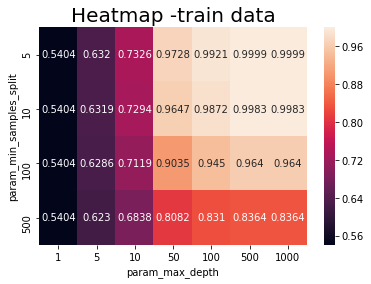

In [92]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

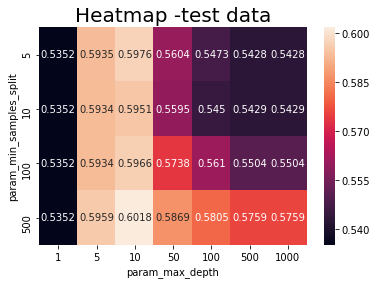

In [93]:
plt.title("Heatmap -test data" , size=20)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')

In [94]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

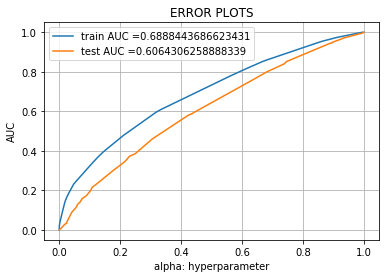

Wall time: 4.44 s


In [95]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=10)
dt.fit(X1_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(dt, X1_train)    
y_test_pred = batch_predict(dt, X1_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [96]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [97]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24601894754906223 for threshold 0.427
[[ 1513  1950]
 [ 4180 14802]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24629364855550256 for threshold 0.445
[[1428 1118]
 [5701 8253]]


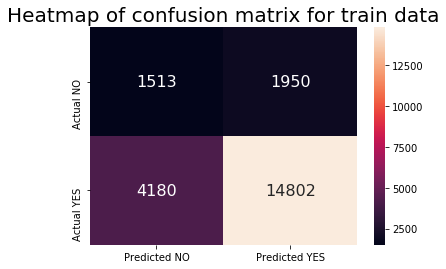

In [98]:
array = [[1513,1950], 
        [4180,14802]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for train data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

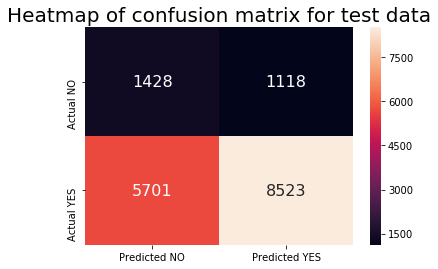

In [99]:
array = [[1428,1118], 
        [5701,8523]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for test data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Getting False Positive Data Points 

In [100]:
l1=[]
print(len(clf.predict(X1_test)))
l1=clf.predict(X1_test)
print(l1)
print(type(l1))

16500
[0 1 0 ... 0 0 0]
<class 'numpy.ndarray'>


In [101]:
v1=[]
for i in range(len(l1)):
    v1.append(l1[i])
print(len(v1))

16500


In [102]:
index1=[]
for i in range(len(v1)):
    if((v1[i]==1)and(y_test[i]==0)):
        index1.append(i)

In [103]:
print(len(index1))

1069


In [104]:
new_df1=X_test.iloc[index1,:]

In [105]:
new_df1.shape

(1069, 26)

In [106]:
new_df1.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_title', 'price',
       'quantity', 'Positive_Sentiment_scores', 'Negative_Sentiment_scores',
       'Neutral_Sentiment_scores', 'Compound_Sentiment_scores'],
      dtype='object')

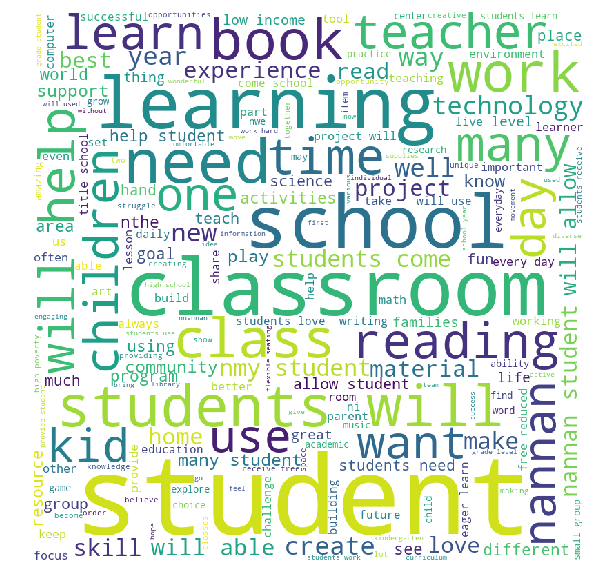

In [107]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df1 = new_df1['essay']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

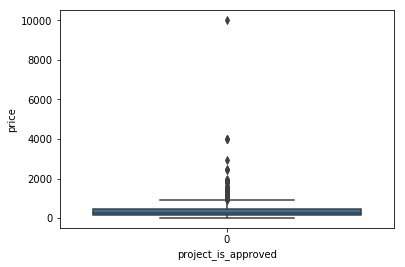

In [108]:
sns.boxplot(x='project_is_approved',y='price', data=new_df1)
plt.show()

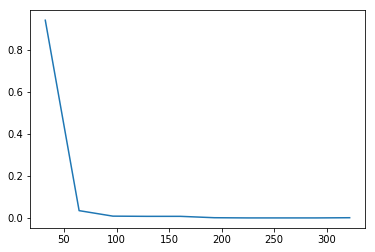

In [109]:
counts, bin_edges = np.histogram(new_df1['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show();

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [110]:
# Please write all the code with proper documentation

In [111]:
feature_names=[]
feature_names.extend(school_state_featurenames)
feature_names.extend(teacher_prefix_featurenames)
feature_names.extend(project_grade_category_featurenames)
feature_names.extend(preprocessed_essays_bow_featurenames)
feature_names.extend(preprocessed_project_title_bow_featurenames)
feature_names.extend(clean_categories_featurenames)
feature_names.extend(clean_subcategories_featurenames)
feature_names.extend(['price'])
feature_names.extend(['teacher_number_of_previously_posted_projects'])
feature_names.extend(['Negative_Sentiment_scores'])
feature_names.extend(['Positive_Sentiment_scores'])
feature_names.extend(['Neutral_Sentiment_scores'])
feature_names.extend(['Compound_Sentiment_scores'])

In [112]:
len(feature_names)

6976

In [115]:
target_names = ['negative ', 'positive']

In [113]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_graphviz = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=3)
dt_graphviz.fit(X1_train, y_train)

Wall time: 644 ms


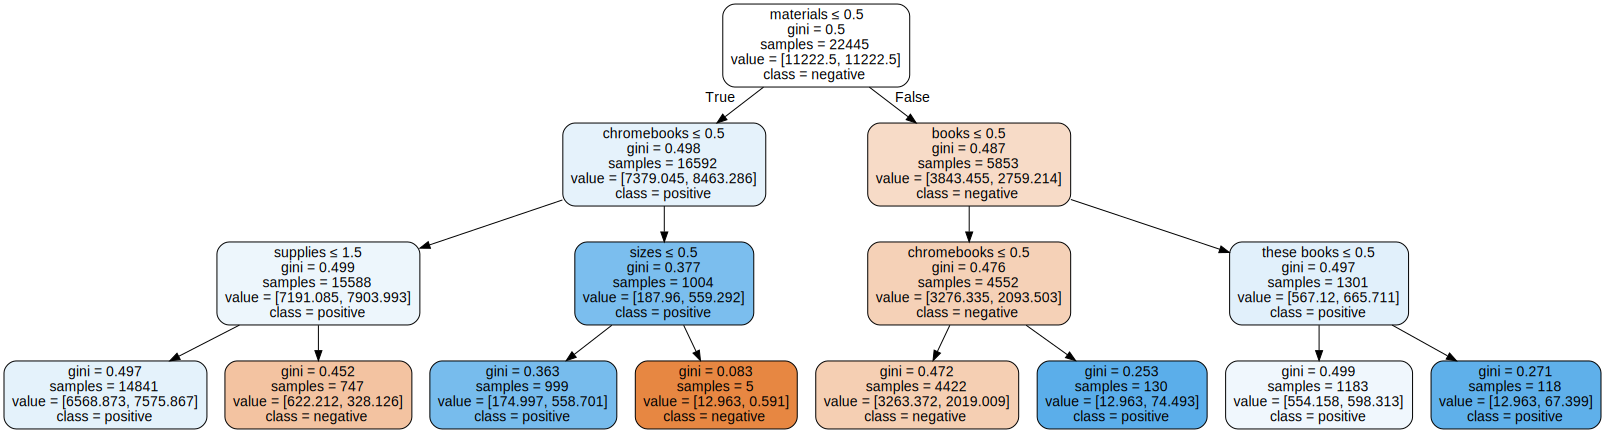

In [116]:
#https://scikit-learn.org/stable/modules/tree.html
import graphviz 
dot_data = tree.export_graphviz(dt_graphviz, out_file=None, feature_names=feature_names,  class_names=target_names, 
                                filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph 

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [120]:
# Please write all the code with proper documentation

In [121]:
X2_train = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_preprocessed_essays_tfidf, X_train_preprocessed_project_title_tfidf, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_Negative_Sentiment_scores_norm, X_train_Positive_Sentiment_scores_norm, X_train_Neutral_Sentiment_scores_norm, X_train_Compound_Sentiment_scores_norm)).tocsr()
X2_train.shape

(22445, 6976)

In [122]:
X2_cv = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_preprocessed_essays_tfidf, X_cv_preprocessed_project_title_tfidf, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_Negative_Sentiment_scores_norm, X_cv_Positive_Sentiment_scores_norm, X_cv_Neutral_Sentiment_scores_norm, X_cv_Compound_Sentiment_scores_norm)).tocsr()
X2_cv.shape

(11055, 6976)

In [123]:
X2_test = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_preprocessed_essays_tfidf, X_test_preprocessed_project_title_tfidf, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_Negative_Sentiment_scores_norm, X_test_Positive_Sentiment_scores_norm, X_test_Neutral_Sentiment_scores_norm, X_test_Compound_Sentiment_scores_norm)).tocsr()
X2_test.shape

(16500, 6976)

In [124]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Using GridSearchCV
depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]
DT = DecisionTreeClassifier(random_state=0,class_weight = 'balanced',criterion='gini', splitter='best')
parameters = {'max_depth': depth,'min_samples_split':min_samples_split}
clf = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X2_train, y_train)

Wall time: 23min 59s


In [125]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [126]:
print("The best value of alpha:",clf.best_params_)

The best value of alpha: {'max_depth': 10, 'min_samples_split': 500}


In [127]:
clf.cv_results_

{'mean_fit_time': array([ 0.64178014,  0.65585391,  0.6552074 ,  0.70311173,  2.76714842,
         2.7474045 ,  2.60909772,  2.56563203,  7.03492347,  6.89336276,
         6.14712636,  4.84361569, 25.21015787, 24.96543821, 19.89204939,
        12.21730232, 32.63583239, 33.47278555, 25.27215981, 14.02732221,
        37.16685716, 35.88926625, 33.92439699, 14.49763497, 38.49583658,
        36.12068582, 32.23849853, 15.5644652 ]),
 'std_fit_time': array([0.06017133, 0.04844353, 0.05121358, 0.00990109, 0.04276764,
        0.02138819, 0.10229376, 0.05342418, 0.16536998, 0.37529764,
        0.21778138, 0.0121997 , 0.04831184, 0.50551295, 0.49036467,
        1.19204648, 0.15654057, 2.35687996, 0.56943804, 2.20823056,
        2.14812147, 2.7888315 , 0.44448704, 2.7821619 , 0.84538851,
        1.62333486, 0.7146993 , 2.94243299]),
 'mean_score_time': array([0.08564051, 0.06572207, 0.06581608, 0.06576856, 0.06661121,
        0.0719192 , 0.06380924, 0.0654068 , 0.07059066, 0.07990185,
        0.06

In [128]:
cv_res = pd.DataFrame(clf.cv_results_)
print(cv_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.641780      0.060171         0.085641        0.003364   
1        0.655854      0.048444         0.065722        0.015144   
2        0.655207      0.051214         0.065816        0.000081   
3        0.703112      0.009901         0.065769        0.003392   
4        2.767148      0.042768         0.066611        0.002088   
5        2.747404      0.021388         0.071919        0.007284   
6        2.609098      0.102294         0.063809        0.003766   
7        2.565632      0.053424         0.065407        0.008792   
8        7.034923      0.165370         0.070591        0.005821   
9        6.893363      0.375298         0.079902        0.011961   
10       6.147126      0.217781         0.066538        0.005320   
11       4.843616      0.012200         0.078894        0.010405   
12      25.210158      0.048312         0.067720        0.004227   
13      24.965438      0.505513         0.076156

27            0.796809          0.835189         0.030302  


In [129]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

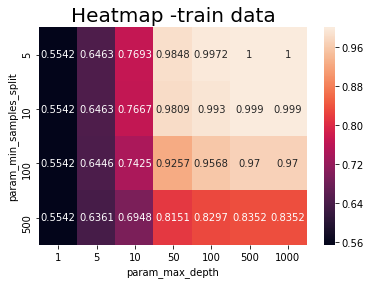

In [130]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

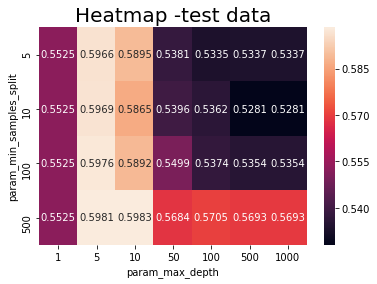

In [131]:
plt.title("Heatmap -test data" , size=20)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')

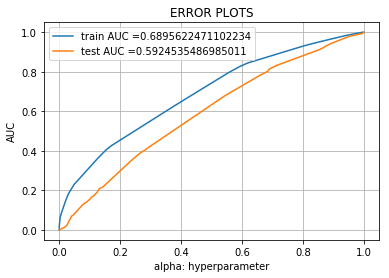

Wall time: 11.2 s


In [132]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=10)
dt.fit(X2_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(dt, X2_train)    
y_test_pred = batch_predict(dt, X2_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [133]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24713065450204208 for threshold 0.487
[[ 1917  1546]
 [ 5839 13143]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24948103366246457 for threshold 0.493
[[1331 1215]
 [5454 8500]]


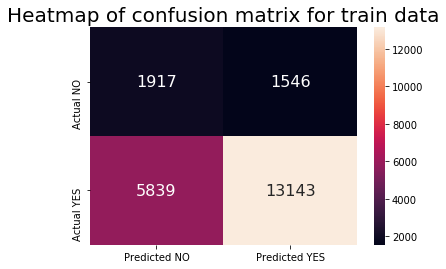

In [134]:
array = [[1917,1546], 
        [5839,13143]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for train data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

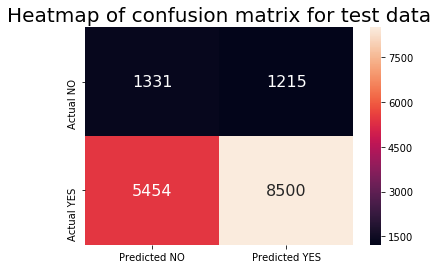

In [135]:
array = [[1331,1215], 
        [5454,8500]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for test data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Getting False Positive Data Points 

In [136]:
l2=[]
print(len(clf.predict(X2_test)))
l2=clf.predict(X2_test)
print(l2)
print(type(l2))

16500
[0 1 1 ... 0 0 0]
<class 'numpy.ndarray'>


In [137]:
v2=[]
for i in range(len(l2)):
    v2.append(l2[i])
print(len(v2))

16500


In [138]:
index2=[]
for i in range(len(v2)):
    if((v2[i]==1)and(y_test[i]==0)):
        index2.append(i)

In [139]:
print(len(index2))

727


In [140]:
new_df2=X_test.iloc[index2,:]

In [141]:
new_df2.shape

(727, 26)

In [142]:
new_df2.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_title', 'price',
       'quantity', 'Positive_Sentiment_scores', 'Negative_Sentiment_scores',
       'Neutral_Sentiment_scores', 'Compound_Sentiment_scores'],
      dtype='object')

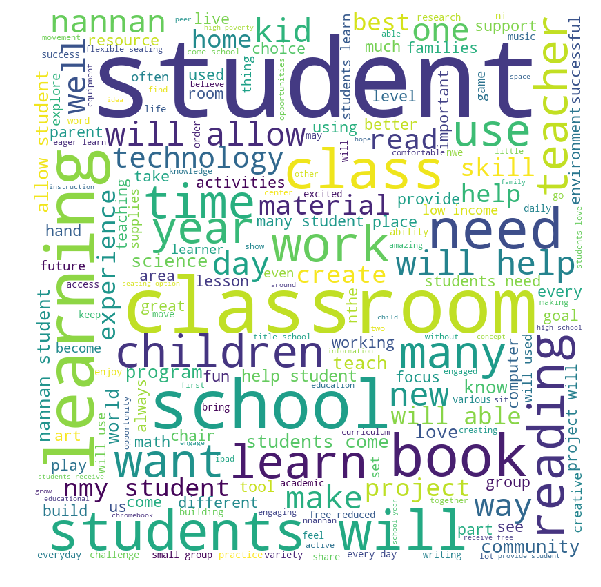

In [143]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df2 = new_df2['essay']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

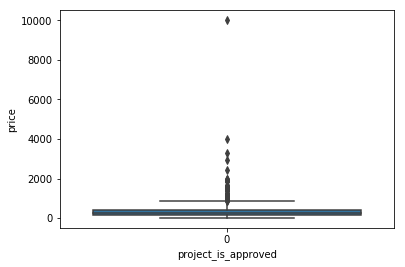

In [144]:
sns.boxplot(x='project_is_approved',y='price', data=new_df2)
plt.show()

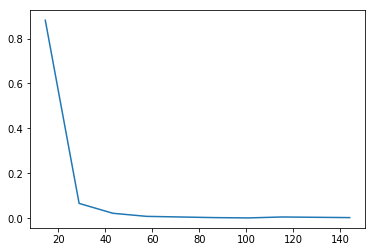

In [145]:
counts, bin_edges = np.histogram(new_df2['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show();

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [146]:
# Please write all the code with proper documentation

In [147]:
feature_names_2=[]
feature_names_2.extend(school_state_featurenames)
feature_names_2.extend(teacher_prefix_featurenames)
feature_names_2.extend(project_grade_category_featurenames)
feature_names_2.extend(preprocessed_essays_tfidf_featurenames)
feature_names_2.extend(preprocessed_project_title_tfidf_featurenames)
feature_names_2.extend(clean_categories_featurenames)
feature_names_2.extend(clean_subcategories_featurenames)
feature_names_2.extend(['price'])
feature_names_2.extend(['teacher_number_of_previously_posted_projects'])
feature_names_2.extend(['Negative_Sentiment_scores'])
feature_names_2.extend(['Positive_Sentiment_scores'])
feature_names_2.extend(['Neutral_Sentiment_scores'])
feature_names_2.extend(['Compound_Sentiment_scores'])

In [148]:
dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=3)
dt.fit(X2_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

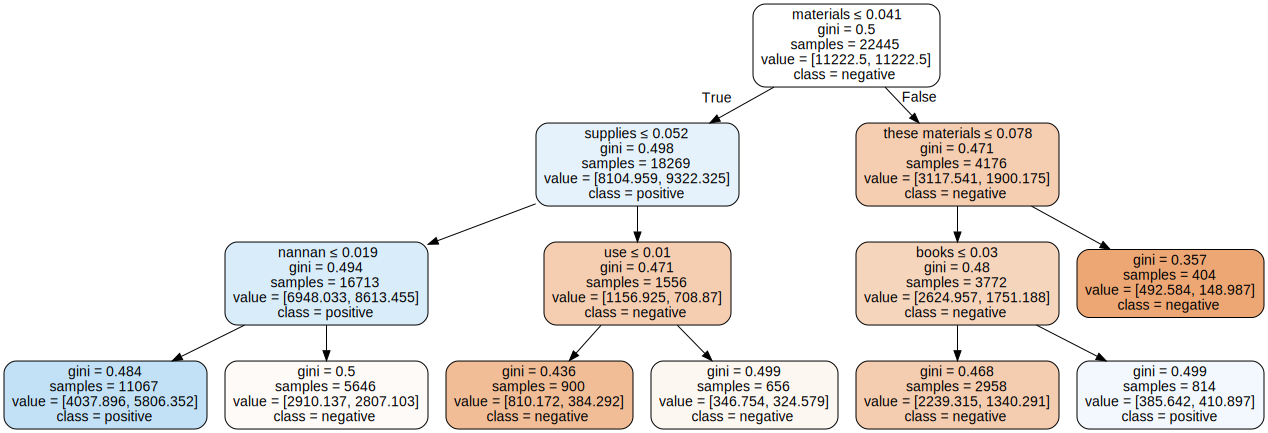

In [149]:
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=feature_names_2,class_names=target_names, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph 

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [150]:
# Please write all the code with proper documentation

In [151]:
X3_train = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_preprocessed_essays_avg_w2v_vectors, X_train_preprocessed_project_title_avg_w2v_vectors, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_Negative_Sentiment_scores_norm, X_train_Positive_Sentiment_scores_norm, X_train_Neutral_Sentiment_scores_norm, X_train_Compound_Sentiment_scores_norm)).tocsr()
X3_train.shape

(22445, 705)

In [152]:
X3_cv = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_preprocessed_essays_avg_w2v_vectors, X_cv_preprocessed_project_title_avg_w2v_vectors, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_Negative_Sentiment_scores_norm, X_cv_Positive_Sentiment_scores_norm, X_cv_Neutral_Sentiment_scores_norm, X_cv_Compound_Sentiment_scores_norm)).tocsr()
X3_cv.shape

(11055, 705)

In [153]:
X3_test = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_preprocessed_essays_avg_w2v_vectors, X_test_preprocessed_project_title_avg_w2v_vectors, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_Negative_Sentiment_scores_norm, X_test_Positive_Sentiment_scores_norm, X_test_Neutral_Sentiment_scores_norm, X_test_Compound_Sentiment_scores_norm)).tocsr()
X3_test.shape

(16500, 705)

In [154]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Using GridSearchCV
depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]
DT = DecisionTreeClassifier(random_state=0,class_weight = 'balanced',criterion='gini', splitter='best')
parameters = {'max_depth': depth,'min_samples_split':min_samples_split}
clf = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X3_train, y_train)

Wall time: 1h 34min 48s


In [155]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [163]:
print("The best value of alpha:",clf.best_params_)

The best value of alpha: {'max_depth': 5, 'min_samples_split': 5}


In [157]:
clf.cv_results_

{'mean_fit_time': array([  3.29618661,   3.2211957 ,   3.20972006,   3.07873559,
         16.05872591,  14.73725533,  15.28482389,  16.26575009,
         41.42448314,  37.3924768 ,  33.10751541,  20.80850387,
         82.54032278,  81.7608343 ,  62.53147006,  24.25233626,
         84.33301067,  85.29671168,  66.06325102,  23.9376595 ,
         81.00593837, 888.55713352,  34.22762227,  12.04125269,
         44.57820813,  43.97593617,  32.89388466,  12.42301615]),
 'std_fit_time': array([9.68225188e-02, 2.64210391e-02, 4.74604709e-02, 3.97372202e-02,
        4.93154150e-01, 2.40037120e-01, 1.06740113e+00, 8.35218007e-01,
        8.44582462e-01, 1.36443720e+00, 7.29135682e-01, 8.20211792e-01,
        2.90592729e+00, 4.12622323e+00, 3.22206060e+00, 2.04154233e+00,
        1.14944322e-01, 1.52898740e+00, 2.62702836e+00, 2.01617862e+00,
        4.05133838e+00, 1.19272750e+03, 1.84838150e+00, 1.04662235e+00,
        2.64277628e-01, 7.65242413e-01, 1.27069875e+00, 8.66800283e-01]),
 'mean_scor

In [158]:
cv_res = pd.DataFrame(clf.cv_results_)
print(cv_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.296187      0.096823         0.326022        0.013692   
1        3.221196      0.026421         0.322528        0.019594   
2        3.209720      0.047460         0.309811        0.018575   
3        3.078736      0.039737         0.292085        0.016053   
4       16.058726      0.493154         0.379433        0.067599   
5       14.737255      0.240037         0.346433        0.020767   
6       15.284824      1.067401         0.331643        0.019092   
7       16.265750      0.835218         0.374622        0.042117   
8       41.424483      0.844582         0.327115        0.021327   
9       37.392477      1.364437         0.314185        0.010583   
10      33.107515      0.729136         0.308444        0.011656   
11      20.808504      0.820212         0.316982        0.002518   
12      82.540323      2.905927         0.313965        0.003927   
13      81.760834      4.126223         0.314320

27            0.754295          0.741002         0.013363  


In [159]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

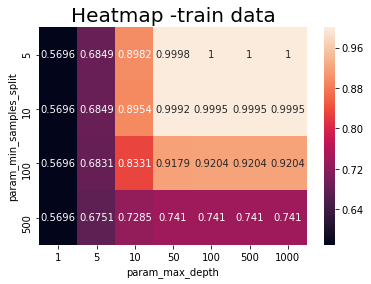

In [160]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

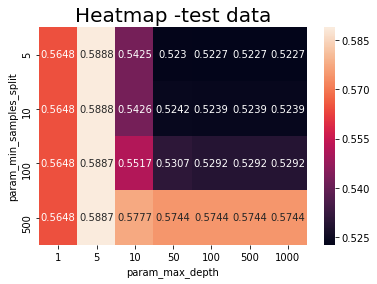

In [161]:
plt.title("Heatmap -test data" , size=20)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')

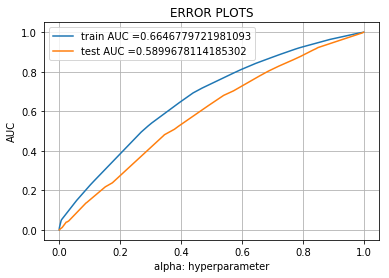

Wall time: 12.2 s


In [164]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=5,max_depth=5)
dt.fit(X3_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(dt, X3_train)    
y_test_pred = batch_predict(dt, X3_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [165]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2491409328715619 for threshold 0.434
[[ 1833  1630]
 [ 5341 13641]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24991114012769905 for threshold 0.532
[[1297 1249]
 [5168 8786]]


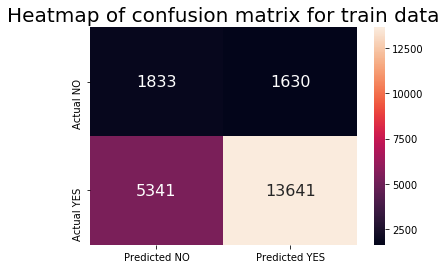

In [166]:
array = [[1833,1630], 
        [5341,13641]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for train data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

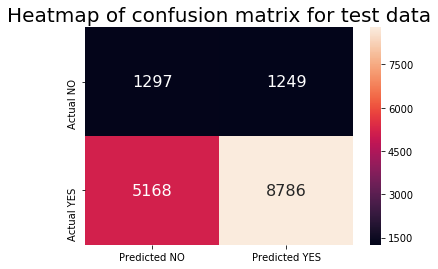

In [167]:
array = [[1297,1249], 
        [5168,8786]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for test data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Getting False Positive Data Points 

In [168]:
l3=[]
print(len(clf.predict(X3_test)))
l3=clf.predict(X3_test)
print(l3)
print(type(l3))

16500
[0 1 1 ... 0 0 0]
<class 'numpy.ndarray'>


In [169]:
v3=[]
for i in range(len(l3)):
    v3.append(l3[i])
print(len(v3))

16500


In [170]:
index3=[]
for i in range(len(v3)):
    if((v3[i]==1)and(y_test[i]==0)):
        index3.append(i)

In [171]:
print(len(index3))

1375


In [173]:
new_df3=X_test.iloc[index3,:]

In [174]:
new_df3.shape

(1375, 26)

In [175]:
new_df3.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_title', 'price',
       'quantity', 'Positive_Sentiment_scores', 'Negative_Sentiment_scores',
       'Neutral_Sentiment_scores', 'Compound_Sentiment_scores'],
      dtype='object')

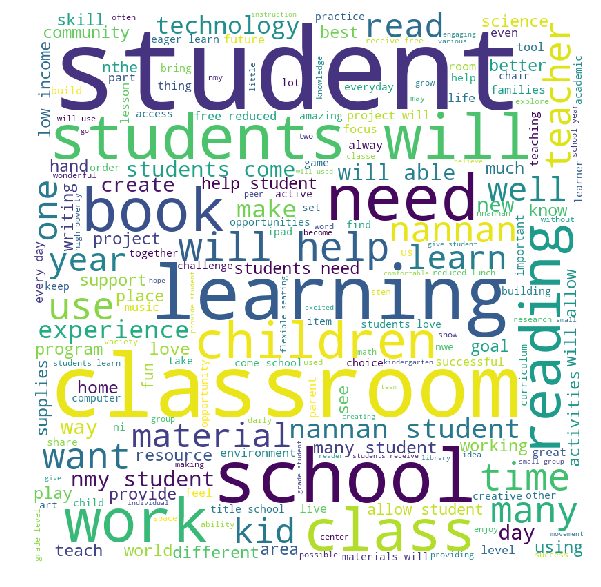

In [176]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df3 = new_df3['essay']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df3: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

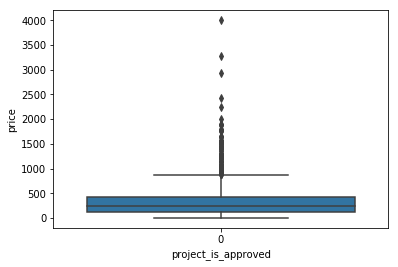

In [177]:
sns.boxplot(x='project_is_approved',y='price', data=new_df3)
plt.show()

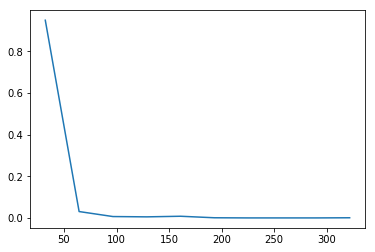

In [178]:
counts, bin_edges = np.histogram(new_df3['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show();

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [179]:
# Please write all the code with proper documentation

In [180]:
X4_train = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_preprocessed_essays_tfidf_w2v_vectors, X_train_preprocessed_project_title_tfidf_w2v_vectors, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_Negative_Sentiment_scores_norm, X_train_Positive_Sentiment_scores_norm, X_train_Neutral_Sentiment_scores_norm, X_train_Compound_Sentiment_scores_norm)).tocsr()
X4_train.shape

(22445, 705)

In [181]:
X4_cv = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_preprocessed_essays_tfidf_w2v_vectors, X_cv_preprocessed_project_title_tfidf_w2v_vectors, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_price_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_Negative_Sentiment_scores_norm, X_cv_Positive_Sentiment_scores_norm, X_cv_Neutral_Sentiment_scores_norm, X_cv_Compound_Sentiment_scores_norm)).tocsr()
X4_cv.shape

(11055, 705)

In [182]:
X4_test = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_preprocessed_essays_tfidf_w2v_vectors, X_test_preprocessed_project_title_tfidf_w2v_vectors, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_Negative_Sentiment_scores_norm, X_test_Positive_Sentiment_scores_norm, X_test_Neutral_Sentiment_scores_norm, X_test_Compound_Sentiment_scores_norm)).tocsr()
X4_test.shape

(16500, 705)

In [183]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Using GridSearchCV
depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]
DT = DecisionTreeClassifier(random_state=0,class_weight = 'balanced',criterion='gini', splitter='best')
parameters = {'max_depth': depth,'min_samples_split':min_samples_split}
clf = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X4_train, y_train)

Wall time: 7h 43min 7s


In [184]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [185]:
print("The best value of alpha:",clf.best_params_)

The best value of alpha: {'max_depth': 10, 'min_samples_split': 500}


In [186]:
clf.cv_results_

{'mean_fit_time': array([1.81085404e+00, 2.24485930e+00, 2.08277408e+00, 1.92061496e+00,
        9.77299817e+00, 7.54869922e+00, 8.17386413e+00, 7.55718867e+00,
        2.31924198e+01, 2.11282984e+01, 1.67083521e+01, 1.06333272e+01,
        4.34554564e+01, 4.17708799e+01, 3.04500143e+01, 1.21184958e+01,
        4.39000477e+01, 4.27559807e+01, 3.17229797e+01, 1.19959912e+01,
        4.33843002e+01, 4.24939140e+01, 8.62645883e+03, 1.33353390e+01,
        4.46009270e+01, 4.35858847e+01, 4.31458379e+01, 1.23017685e+01]),
 'std_fit_time': array([1.04269659e-01, 1.50367523e-01, 2.01072962e-01, 2.61028236e-01,
        8.77936397e-01, 6.56797653e-01, 5.55275719e-01, 9.32435150e-01,
        1.31659638e+00, 2.26991093e+00, 2.51214573e-01, 2.70979698e-01,
        3.45396205e+00, 2.16032180e+00, 2.16839041e+00, 7.46667272e-01,
        1.98505211e+00, 2.06351811e+00, 2.52505758e+00, 7.18666617e-01,
        1.85602078e+00, 2.07471883e+00, 1.21533318e+04, 1.01317424e+00,
        1.85551256e+00, 2.823

In [187]:
cv_res = pd.DataFrame(clf.cv_results_)
print(cv_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.810854      0.104270         0.195741        0.028435   
1        2.244859      0.150368         0.217718        0.024343   
2        2.082774      0.201073         0.222831        0.041038   
3        1.920615      0.261028         0.208504        0.025180   
4        9.772998      0.877936         0.229781        0.033285   
5        7.548699      0.656798         0.174212        0.016374   
6        8.173864      0.555276         0.218287        0.041947   
7        7.557189      0.932435         0.180238        0.009355   
8       23.192420      1.316596         0.218009        0.031916   
9       21.128298      2.269911         0.173582        0.015692   
10      16.708352      0.251215         0.157125        0.001884   
11      10.633327      0.270980         0.171901        0.017133   
12      43.455456      3.453962         0.169107        0.010485   
13      41.770880      2.160322         0.161119

27            0.746935          0.744482         0.004486  


In [188]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

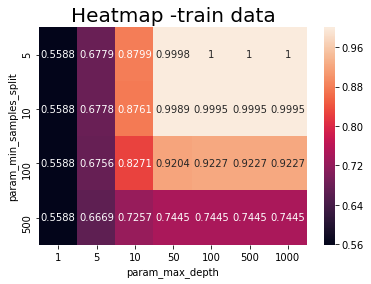

In [189]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

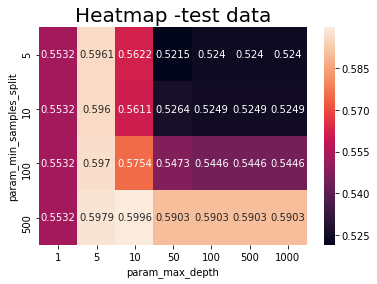

In [190]:
plt.title("Heatmap -test data" , size=20)
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')

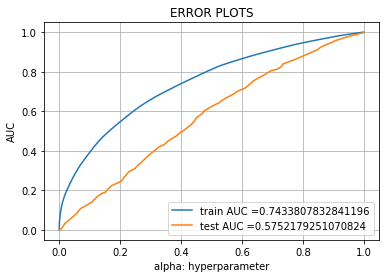

Wall time: 20.9 s


In [191]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=10)
dt.fit(X4_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(dt, X4_train)    
y_test_pred = batch_predict(dt, X4_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [192]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24992242983850813 for threshold 0.417
[[ 1762  1701]
 [ 3681 15301]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999012668085546 for threshold 0.491
[[1281 1265]
 [5278 8676]]


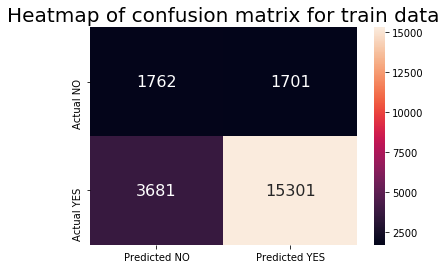

In [193]:
array = [[1762,1701], 
        [3681,15301]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for train data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

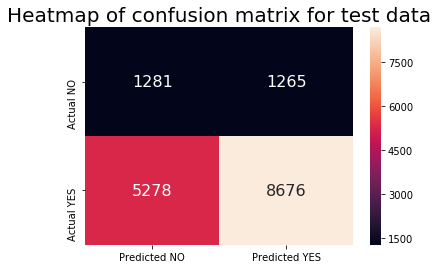

In [194]:
array = [[1281,1265], 
        [5278,8676]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for test data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### Getting False Positive Data Points 

In [195]:
l4=[]
print(len(clf.predict(X4_test)))
l4=clf.predict(X4_test)
print(l4)
print(type(l4))

16500
[0 1 0 ... 1 0 1]
<class 'numpy.ndarray'>


In [196]:
v4=[]
for i in range(len(l4)):
    v4.append(l4[i])
print(len(v4))

16500


In [197]:
index4=[]
for i in range(len(v4)):
    if((v4[i]==1)and(y_test[i]==0)):
        index4.append(i)

In [198]:
print(len(index4))

1209


In [200]:
new_df4=X_test.iloc[index4,:]

In [201]:
new_df4.shape

(1209, 26)

In [202]:
new_df4.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_title', 'price',
       'quantity', 'Positive_Sentiment_scores', 'Negative_Sentiment_scores',
       'Neutral_Sentiment_scores', 'Compound_Sentiment_scores'],
      dtype='object')

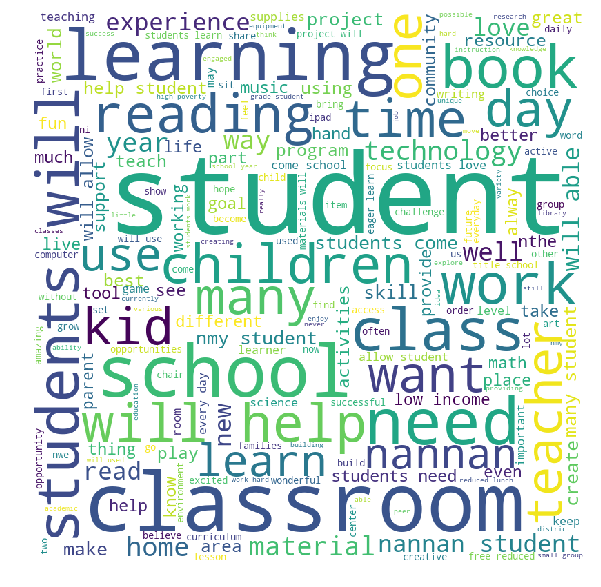

In [203]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df4 = new_df4['essay']
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df4: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

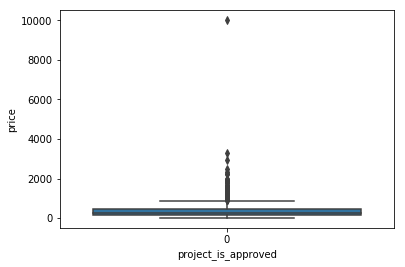

In [204]:
sns.boxplot(x='project_is_approved',y='price', data=new_df4)
plt.show()

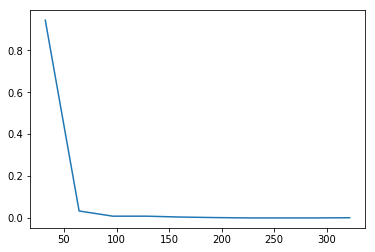

In [205]:
counts, bin_edges = np.histogram(new_df4['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.show();

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [206]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

[1.37208252e-04 5.77210480e-05 2.17496042e-04 ... 2.53290797e-05
 0.00000000e+00 1.00370294e-04]


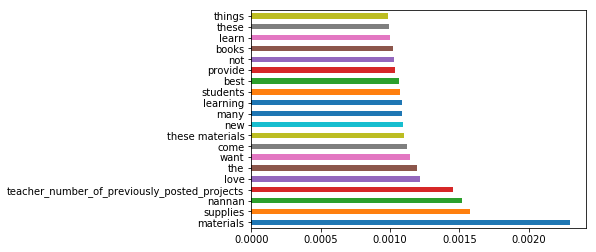

In [209]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=feature_names_2)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [217]:
from sklearn.feature_selection import SelectFromModel

print("Shape of X2_train:", X2_train.shape)
print("Shape of X2_cv:", X2_cv.shape)
print("Shape of X2_test:", X2_test.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf_train = clf.fit(X2_train, y_train)
clf_train.feature_importances_
model_train = SelectFromModel(clf_train,max_features =5000 ,threshold=-np.inf,prefit=True)
Xtrain_new = model_train.transform(X2_train)
print("Shape of Xtrain_new:",Xtrain_new.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf_cv = clf.fit(X2_cv, y_cv)
clf_cv.feature_importances_
model_cv = SelectFromModel(clf_cv,max_features =5000 ,threshold=-np.inf,prefit=True)
Xcv_new = model_cv.transform(X2_cv)
print("Shape of Xcv_new:", Xcv_new.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf_test = clf.fit(X2_test, y_test)
clf_test.feature_importances_
model_test = SelectFromModel(clf_test,max_features =5000 ,threshold=-np.inf,prefit=True)
Xtest_new = model_test.transform(X2_test)
print("Shape of Xtest_new:", Xtest_new.shape)

Shape of X2_train: (22445, 6976)
Shape of X2_cv: (11055, 6976)
Shape of X2_test: (16500, 6976)
Shape of Xtrain_new: (22445, 5000)
Shape of Xcv_new: (11055, 5000)
Shape of Xtest_new: (16500, 5000)


In [218]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.datasets import *
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Using GridSearchCV
depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]
DT = DecisionTreeClassifier(random_state=0,class_weight = 'balanced',criterion='gini', splitter='best')
parameters = {'max_depth': depth,'min_samples_split':min_samples_split}
clf = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(Xtrain_new, y_train)

Wall time: 12min 11s


In [219]:
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [220]:
print("The best value of alpha:",clf.best_params_)

The best value of alpha: {'max_depth': 5, 'min_samples_split': 500}


In [221]:
clf.cv_results_

{'mean_fit_time': array([ 0.37067032,  0.34574246,  0.35272288,  0.37366684,  1.4912254 ,
         1.39281003,  1.32013504,  1.27327092,  3.58840418,  3.42254686,
         4.10731101,  2.70774261, 14.43922019, 14.22301992, 13.08543205,
         7.34409245, 19.06461294, 16.47208039, 14.22182719,  7.01772332,
        18.41400337, 18.16981729, 14.64369623,  7.35987918, 17.92523996,
        17.5770301 , 14.04980659,  6.88611388]),
 'std_fit_time': array([0.00652396, 0.0052975 , 0.01669525, 0.03628387, 0.03936258,
        0.02227044, 0.02047597, 0.01607605, 0.1659467 , 0.17800927,
        0.51084201, 0.19113601, 0.78695606, 0.33876325, 0.64054647,
        0.80069194, 2.05117299, 0.14840894, 1.66682173, 0.59782522,
        0.53002812, 0.9052228 , 0.69521151, 0.86554115, 0.71314909,
        0.34221883, 0.54366953, 0.79821829]),
 'mean_score_time': array([0.02627532, 0.0132974 , 0.01429582, 0.01329859, 0.01695665,
        0.0142947 , 0.01329923, 0.01329923, 0.02426887, 0.0152936 ,
        0.01

In [222]:
cv_res = pd.DataFrame(clf.cv_results_)
print(cv_res)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.370670      0.006524         0.026275    1.812205e-02   
1        0.345742      0.005298         0.013297    4.696288e-04   
2        0.352723      0.016695         0.014296    1.243114e-03   
3        0.373667      0.036284         0.013299    4.699660e-04   
4        1.491225      0.039363         0.016957    1.629274e-03   
5        1.392810      0.022270         0.014295    1.242966e-03   
6        1.320135      0.020476         0.013299    4.703589e-04   
7        1.273271      0.016076         0.013299    4.708646e-04   
8        3.588404      0.165947         0.024269    1.457472e-02   
9        3.422547      0.178009         0.015294    1.880761e-03   
10       4.107311      0.510842         0.019947    3.732678e-03   
11       2.707743      0.191136         0.022289    6.223313e-03   
12      14.439220      0.786956         0.018453    2.663719e-03   
13      14.223020      0.338763         0.017607

27            0.817078          0.835321         0.019924  


In [223]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

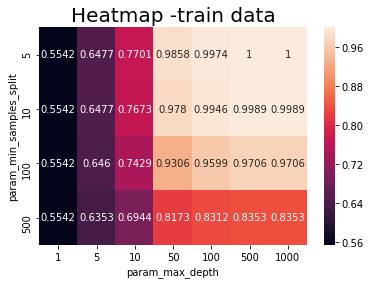

In [224]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

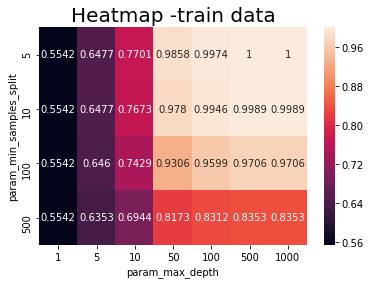

In [225]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
max_scores = cv_res.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
plt.title("Heatmap -train data" , size=20)
sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g')

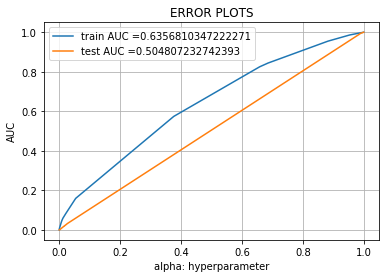

Wall time: 2.76 s


In [226]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt = DecisionTreeClassifier(random_state=5,class_weight = 'balanced',min_samples_split=500,max_depth=5)
dt.fit(Xtrain_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(dt, Xtrain_new)    
y_test_pred = batch_predict(dt, Xtest_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [227]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.23461769730401058 for threshold 0.563
[[ 2161  1302]
 [ 8084 10898]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.026366853046134935 for threshold 0.779
[[ 2505    41]
 [13679   275]]


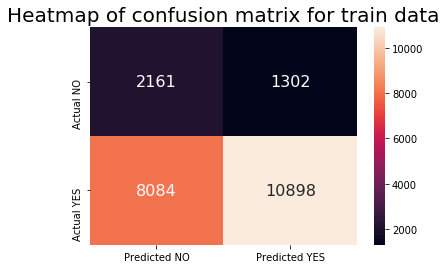

In [228]:
array = [[2161,1302], 
        [8084,10898]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for train data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

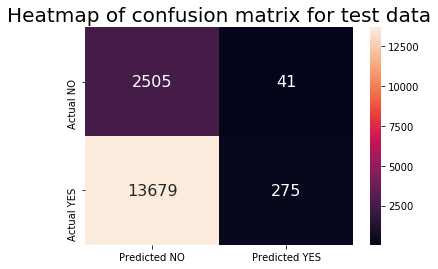

In [229]:
array = [[2505,41], 
        [13679,275]]
df_cm = pd.DataFrame(array, index = ['Actual NO', 'Actual YES'],
                  columns = ['Predicted NO','Predicted YES'])
plt.figure(figsize = (6,4))
plt.title("Heatmap of confusion matrix for test data" , size=20)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [230]:
# Please compare all your models using Prettytable library

In [238]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameter", "AUC"]
x.add_row(["Bag of Words", "Brute Force",  'max_depth: 10, min_samples_split: 500', 0.69])
x.add_row(["TFIDF", "Brute Force", 'max_depth: 10, min_samples_split: 500', 0.69])
x.add_row(["AVG W2V", "Brute Force", 'max_depth: 5, min_samples_split: 5', 0.66])
x.add_row(["TFIDF W2V", "Brute Force", 'max_depth: 10, min_samples_split: 500', 0.74])
x.add_row(["SET 5", "Brute Force", 'max_depth: 5, min_samples_split: 500', 0.65])

print(x)

+--------------+-------------+---------------------------------------+------+
|  Vectorizer  |    Model    |             Hyperparameter            | AUC  |
+--------------+-------------+---------------------------------------+------+
| Bag of Words | Brute Force | max_depth: 10, min_samples_split: 500 | 0.69 |
|    TFIDF     | Brute Force | max_depth: 10, min_samples_split: 500 | 0.69 |
|   AVG W2V    | Brute Force |   max_depth: 5, min_samples_split: 5  | 0.66 |
|  TFIDF W2V   | Brute Force | max_depth: 10, min_samples_split: 500 | 0.74 |
|    SET 5     | Brute Force |  max_depth: 5, min_samples_split: 500 | 0.65 |
+--------------+-------------+---------------------------------------+------+
